In [33]:
import os

In [34]:
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.chains.sequential import SequentialChain
from langchain.callbacks import get_openai_callback
import json
import pandas as pd
import traceback
from dotenv import load_dotenv   
import PyPDF2

In [35]:
load_dotenv()

True

In [36]:
open_key = os.getenv('openai_key')

In [37]:
llm = ChatOpenAI(openai_api_key = open_key, model_name='gpt-3.5-turbo',temperature =0.7)

f:\ML\NLP\MCQ-Generator\venv\Lib\site-packages\langchain_core-0.1.52-py3.11.egg\langchain_core\_api\deprecation.py:119: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


In [38]:
template = """
Text:{text}
You are an expert MCQ maker. Given the above text, it is your job to \
create a quiz  of {number} multiple choice questions for {subject} students in {tone} tone. 
Make sure the questions are not repeated and check all the questions to be conforming the text as well.
Make sure to format your response like  RESPONSE_JSON below  and use it as a guide. \
Ensure to make {number} MCQs
### RESPONSE_JSON
{RESPONSE_JSON}
"""

In [39]:
prompt_template = PromptTemplate(
    input_variables=['text','number','subject','tone','RESPONSE_JSON'],
    template=template
)

In [40]:
with open('F:/ML/NLP/MCQ-Generator/Response.json','r') as f:
    RESPONSE_JSON = json.load(f)

In [41]:
RESPONSE_JSON

{'1': {'no': '1',
  'mcq': 'multiple choice questions',
  'options': {'a': 'choice here',
   'b': 'choice here',
   'c': 'choice here',
   'd': 'choice here'},
  'correct': 'correct answer'},
 '2': {'no': '2',
  'mcq': 'multiple choice questions',
  'options': {'a': 'choice here',
   'b': 'choice here',
   'c': 'choice here',
   'd': 'choice here'},
  'correct': 'correct answer'},
 '3': {'no': '3',
  'mcq': 'multiple choice questions',
  'options': {'a': 'choice here',
   'b': 'choice here',
   'c': 'choice here',
   'd': 'choice here'},
  'correct': 'correct answer'}}

In [42]:
quiz_chain = LLMChain(llm =llm, prompt=prompt_template, output_key = 'quiz',verbose=True)

f:\ML\NLP\MCQ-Generator\venv\Lib\site-packages\langchain_core-0.1.52-py3.11.egg\langchain_core\_api\deprecation.py:119: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 0.3.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


In [43]:
template2="""
You are an expert english grammarian and writer. Given a Multiple Choice Quiz for {subject} students.\
You need to evaluate the complexity of the question and give a complete analysis of the quiz. Only use at max 50 words for complexity analysis. 
if the quiz is not at per with the cognitive and analytical abilities of the students,\
update the quiz questions which needs to be changed and change the tone such that it perfectly fits the student abilities
Quiz_MCQs:
{quiz}

Check from an expert English Writer of the above quiz:
"""

In [44]:
evalution_prompt_template = PromptTemplate(
    input_variables=['subject','quiz'],
    template=template2
)

In [45]:
review_chain = LLMChain(llm =llm, prompt=evalution_prompt_template, output_key = 'review',verbose=True)

In [46]:
generate_evaluate_chain = SequentialChain(chains=[quiz_chain,review_chain],input_variables=['text','number','subject','tone','RESPONSE_JSON'],output_variables=['quiz','review'])

In [47]:
# paragraph for MCQ generation
with open('F:/ML/NLP/MCQ-Generator/data.txt') as f:
    text = f.read()

In [48]:
text

'Cricket is a bat-and-ball game that is played between two teams of eleven players on a field at the centre of which is a 22-yard (20-metre) pitch with a wicket at each end, each comprising two bails balanced on three stumps. Two players from the batting team (the striker and nonstriker) stand in front of either wicket, with one player from the fielding team (the bowler) bowling the ball towards the striker\'s wicket from the opposite end of the pitch. The striker\'s goal is to hit the bowled ball and then switch places with the nonstriker, with the batting team scoring one run for each exchange. Runs are also scored when the ball reaches or crosses the boundary of the field or when the ball is bowled illegally.\n\nThe fielding team tries to prevent runs from being scored by dismissing batters (so they are "out"). Means of dismissal include being bowled, when the ball hits the striker\'s wicket and dislodges the bails, and by the fielding side either catching the ball after it is hit b

In [49]:
number = 5
subject = 'Sport'
tone = 'Simple'

In [50]:
import json
RESPONSE_JSON = json.dumps(RESPONSE_JSON)

In [51]:
RESPONSE_JSON

'{"1": {"no": "1", "mcq": "multiple choice questions", "options": {"a": "choice here", "b": "choice here", "c": "choice here", "d": "choice here"}, "correct": "correct answer"}, "2": {"no": "2", "mcq": "multiple choice questions", "options": {"a": "choice here", "b": "choice here", "c": "choice here", "d": "choice here"}, "correct": "correct answer"}, "3": {"no": "3", "mcq": "multiple choice questions", "options": {"a": "choice here", "b": "choice here", "c": "choice here", "d": "choice here"}, "correct": "correct answer"}}'

In [52]:

with get_openai_callback() as cb:
    response = generate_evaluate_chain(
        {
        'text':text,
        'number':number,
        'subject':subject,
        'tone':tone,
        'RESPONSE_JSON':RESPONSE_JSON
        }
    )

f:\ML\NLP\MCQ-Generator\venv\Lib\site-packages\langchain_core-0.1.52-py3.11.egg\langchain_core\_api\deprecation.py:119: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(




> Entering new LLMChain chain...
Prompt after formatting:

Text:Cricket is a bat-and-ball game that is played between two teams of eleven players on a field at the centre of which is a 22-yard (20-metre) pitch with a wicket at each end, each comprising two bails balanced on three stumps. Two players from the batting team (the striker and nonstriker) stand in front of either wicket, with one player from the fielding team (the bowler) bowling the ball towards the striker's wicket from the opposite end of the pitch. The striker's goal is to hit the bowled ball and then switch places with the nonstriker, with the batting team scoring one run for each exchange. Runs are also scored when the ball reaches or crosses the boundary of the field or when the ball is bowled illegally.

The fielding team tries to prevent runs from being scored by dismissing batters (so they are "out"). Means of dismissal include being bowled, when the ball hits the striker's wicket and dislodges the bails, and by 

In [53]:
print(f"Total Tokens: {cb.total_tokens}")
print(f"Prompt Tokens: {cb.prompt_tokens}")
print(f"Completion Tokens: {cb.completion_tokens}")
print(f"Total Cost (USD): ${cb.total_cost}")

Total Tokens: 1835
Prompt Tokens: 1355
Completion Tokens: 480
Total Cost (USD): $0.0029925


In [54]:
quiz = response.get('quiz')
quiz

'\n{\n    "1": {\n        "no": "1",\n        "mcq": "What is the main objective of the fielding team in cricket?",\n        "options": {\n            "a": "To score runs",\n            "b": "To dismiss batters",\n            "c": "To hit boundaries",\n            "d": "To switch places with the nonstriker"\n        },\n        "correct": "b"\n    },\n    "2": {\n        "no": "2",\n        "mcq": "What is the role of the bowler in cricket?",\n        "options": {\n            "a": "To hit boundaries",\n            "b": "To switch places with the nonstriker",\n            "c": "To bowl the ball towards the striker\'s wicket",\n            "d": "To score runs"\n        },\n        "correct": "c"\n    },\n    "3": {\n        "no": "3",\n        "mcq": "How many bails are balanced on the stumps of a wicket in cricket?",\n        "options": {\n            "a": "One",\n            "b": "Three",\n            "c": "Two",\n            "d": "Four"\n        },\n        "correct": "c"\n    },\n  

In [55]:
type(quiz)

str

In [56]:
quiz = json.loads(quiz)
quiz

{'1': {'no': '1',
  'mcq': 'What is the main objective of the fielding team in cricket?',
  'options': {'a': 'To score runs',
   'b': 'To dismiss batters',
   'c': 'To hit boundaries',
   'd': 'To switch places with the nonstriker'},
  'correct': 'b'},
 '2': {'no': '2',
  'mcq': 'What is the role of the bowler in cricket?',
  'options': {'a': 'To hit boundaries',
   'b': 'To switch places with the nonstriker',
   'c': "To bowl the ball towards the striker's wicket",
   'd': 'To score runs'},
  'correct': 'c'},
 '3': {'no': '3',
  'mcq': 'How many bails are balanced on the stumps of a wicket in cricket?',
  'options': {'a': 'One', 'b': 'Three', 'c': 'Two', 'd': 'Four'},
  'correct': 'c'},
 '4': {'no': '4',
  'mcq': 'What is the purpose of wearing protective gear in cricket?',
  'options': {'a': 'To hit boundaries',
   'b': 'To prevent injury caused by the ball',
   'c': 'To dismiss batters',
   'd': 'To score runs'},
  'correct': 'b'},
 '5': {'no': '5',
  'mcq': 'Which governing body is

In [57]:
type(quiz)

dict

In [58]:
type(quiz.items())

dict_items

In [59]:

for key,value in quiz.items():
    print(value)

{'no': '1', 'mcq': 'What is the main objective of the fielding team in cricket?', 'options': {'a': 'To score runs', 'b': 'To dismiss batters', 'c': 'To hit boundaries', 'd': 'To switch places with the nonstriker'}, 'correct': 'b'}
{'no': '2', 'mcq': 'What is the role of the bowler in cricket?', 'options': {'a': 'To hit boundaries', 'b': 'To switch places with the nonstriker', 'c': "To bowl the ball towards the striker's wicket", 'd': 'To score runs'}, 'correct': 'c'}
{'no': '3', 'mcq': 'How many bails are balanced on the stumps of a wicket in cricket?', 'options': {'a': 'One', 'b': 'Three', 'c': 'Two', 'd': 'Four'}, 'correct': 'c'}
{'no': '4', 'mcq': 'What is the purpose of wearing protective gear in cricket?', 'options': {'a': 'To hit boundaries', 'b': 'To prevent injury caused by the ball', 'c': 'To dismiss batters', 'd': 'To score runs'}, 'correct': 'b'}
{'no': '5', 'mcq': 'Which governing body is responsible for maintaining the Laws of Cricket?', 'options': {'a': 'International Cri

In [77]:
quiz_table = []

for key,value in quiz.items():
    QNO = value['no']
    mcq = value['mcq']
    options = "|".join(
        #list comprehension
        [
            f"{option}:{option_value}"
            for option , option_value in value['options'].items()
        ]
    )

    correct = value['correct']
    quiz_table.append({"Q.NO.":QNO,"MCQ":mcq,"Choices":options,"Correct":correct})

In [78]:
quiz_table

[{'Q.NO.': '1',
  'MCQ': 'What is the main objective of the fielding team in cricket?',
  'Choices': 'a:To score runs|b:To dismiss batters|c:To hit boundaries|d:To switch places with the nonstriker',
  'Correct': 'b'},
 {'Q.NO.': '2',
  'MCQ': 'What is the role of the bowler in cricket?',
  'Choices': "a:To hit boundaries|b:To switch places with the nonstriker|c:To bowl the ball towards the striker's wicket|d:To score runs",
  'Correct': 'c'},
 {'Q.NO.': '3',
  'MCQ': 'How many bails are balanced on the stumps of a wicket in cricket?',
  'Choices': 'a:One|b:Three|c:Two|d:Four',
  'Correct': 'c'},
 {'Q.NO.': '4',
  'MCQ': 'What is the purpose of wearing protective gear in cricket?',
  'Choices': 'a:To hit boundaries|b:To prevent injury caused by the ball|c:To dismiss batters|d:To score runs',
  'Correct': 'b'},
 {'Q.NO.': '5',
  'MCQ': 'Which governing body is responsible for maintaining the Laws of Cricket?',
  'Choices': 'a:International Cricket Council|b:Marylebone Cricket Club|c:FIF

In [79]:
type(quiz_table)

list

In [80]:
df = pd.DataFrame(quiz_table)
df

,Q.NO.,MCQ,Choices,Correct
0,1,What is the main objective of the fielding tea...,a:To score runs|b:To dismiss batters|c:To hit ...,b
1,2,What is the role of the bowler in cricket?,a:To hit boundaries|b:To switch places with th...,c
2,3,How many bails are balanced on the stumps of a...,a:One|b:Three|c:Two|d:Four,c
3,4,What is the purpose of wearing protective gear...,a:To hit boundaries|b:To prevent injury caused...,b
4,5,Which governing body is responsible for mainta...,a:International Cricket Council|b:Marylebone C...,b


In [75]:
df.to_csv('quiz_cricket1.csv',index = False)

In [1]:

log_file = "{datetime.now().strtime('%m_%d_%Y_%H_%M_%S')}.log"


In [2]:
log_file

"{datetime.now().strtime('%m_%d_%Y_%H_%M_%S')}.log"

In [13]:
from datetime import datetime
datetime.now().strftime("%d/%m/%Y %H:%M:%S")

'11/05/2024 10:53:06'

In [14]:
datetimeFormat = '%d/%m/%Y %H:%M:%S'
log_file = "{datetime.now().strftime({datetimeFormat})}.log"

In [17]:
datetime.now().strftime(datetimeFormat)

'11/05/2024 10:59:39'

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st

# Function to create PDF
def create_pdf(df, filename):
    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(10, 5))

    # Hide the axes
    ax.axis('off')

    # Create a table and add it to the axis
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')

    # Save the figure as a PDF
    plt.savefig(filename)

# Sample data
data = {'Name': ['John', 'Anna', 'Peter', 'Linda'],
        'Age': [28, 35, 45, 30],
        'City': ['New York', 'Paris', 'London', 'Berlin']}


# def PDF(subject, data):
#     if st.button('Download PDF'):
#         filename = subject + ".pdf"
#         create_pdf(data,filename)
#         st.success('PDF file has been downloaded!')


# Add a link to download the PDF directly
# st.markdown('[Download PDF](dataframe.pdf)', unsafe_allow_html=True)

In [69]:
df.values

array([['1',
        'What is the main objective of the fielding team in cricket?',
        'a:To score runs | b:To dismiss batters | c:To hit boundaries | d:To switch places with the nonstriker',
        'b'],
       ['2', 'What is the role of the bowler in cricket?',
        "a:To hit boundaries | b:To switch places with the nonstriker | c:To bowl the ball towards the striker's wicket | d:To score runs",
        'c'],
       ['3',
        'How many bails are balanced on the stumps of a wicket in cricket?',
        'a:One | b:Three | c:Two | d:Four', 'c'],
       ['4',
        'What is the purpose of wearing protective gear in cricket?',
        'a:To hit boundaries | b:To prevent injury caused by the ball | c:To dismiss batters | d:To score runs',
        'b'],
       ['5',
        'Which governing body is responsible for maintaining the Laws of Cricket?',
        'a:International Cricket Council | b:Marylebone Cricket Club | c:FIFA | d:NBA',
        'b']], dtype=object)

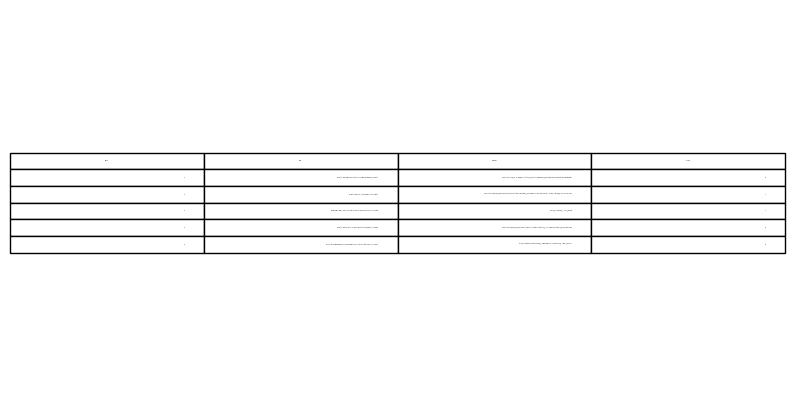

In [66]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, loc='center')

In [76]:
from csv2pdf import convert
convert('F:/ML/NLP/MCQ-Generator/experiment/quiz_cricket1.csv','quiz_cricket.pdf')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15160\4117418419.py:2: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=3 use new_x=XPos.RIGHT, new_y=YPos.TOP.
  convert('F:/ML/NLP/MCQ-Generator/experiment/quiz_cricket1.csv','quiz_cricket.pdf')
